In [8]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

In [9]:
fert = DstApi('FOD33')

In [10]:
tabsum_fert= fert.tablesummary(language='en')
display(tabsum_fert)

Table FOD33: Fertility rates by age and time
Last update: 2024-02-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,ALDER,38,TOT1,Total fertility rate,NETTO,Net Reproduction Rate,False
1,Tid,51,1973,1973,2023,2023,True


In [11]:
# The available values for a each variable: 
for variable in tabsum_fert['variable name']:
    print(variable+':')
    display(fert.variable_levels(variable, language='en'))

ALDER:


,id,text
0,TOT1,Total fertility rate
1,15,15 years
2,16,16 years
3,17,17 years
4,18,18 years
5,19,19 years
6,20,20 years
7,21,21 years
8,22,22 years
9,23,23 years


Tid:


,id,text
0,1973,1973
1,1974,1974
2,1975,1975
3,1976,1976
4,1977,1977
5,1978,1978
6,1979,1979
7,1980,1980
8,1981,1981
9,1982,1982


In [12]:
params = fert.define_base_params(language='en')
params

{'table': 'fod33',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'ALDER', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [20]:
params ={'table': 'fod33',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'ALDER', 'values': ['*']},
  {'code': 'Tid', 'values': ['>2008<=2023']}]}

In [24]:
fert_api = fert.get_data(params=params)
fert_api.head(10000)

,ALDER,TID,INDHOLD
0,15 years,2010,0.2
1,16 years,2010,0.5
2,17 years,2010,2.1
3,18 years,2010,4.6
4,19 years,2010,10.5
...,...,...,...
565,32 years,2023,124.5
566,36 years,2023,75.1
567,40 years,2023,31.8
568,44 years,2023,5.6


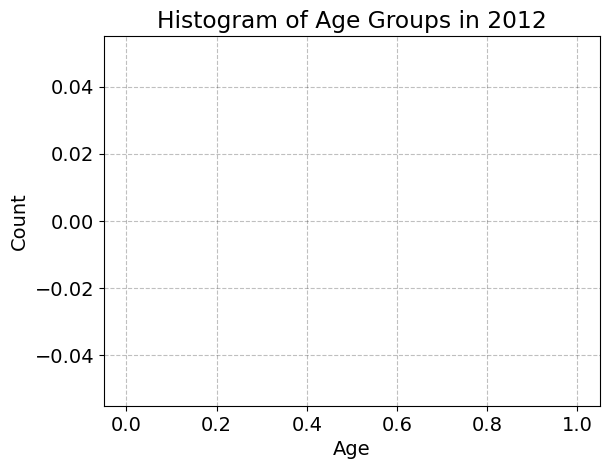

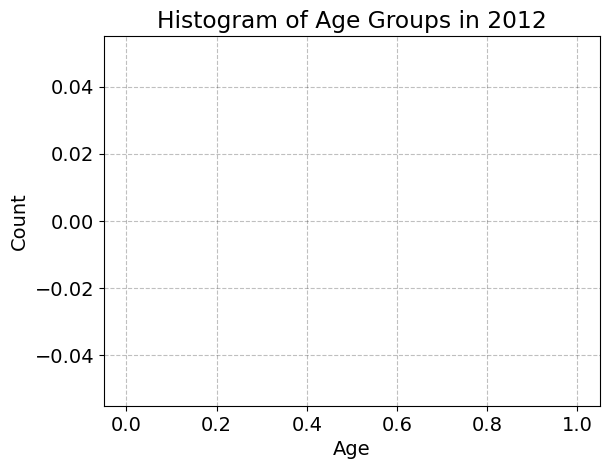

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the year 2012 and the specified age groups
filtered_data = fert_api[(fert_api['TID'] == '2012') & (fert_api['ALDER'].isin(['15', '25', '35', '45']))]

# Convert the 'INDHOLD' column to numeric
filtered_data['values'] = pd.to_numeric(filtered_data['INDHOLD'])

# Create a histogram
plt.hist(filtered_data['ALDER'], bins=10)

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age Groups in 2012')

# Show the plot
plt.show()
